# Region 40: Mai Linh Luong

To divide the work, we first had to take a look where most of the medications are being sold in which region. In this case, the top 5 regions are: number 20, 10, 30, 40 and 22. I had to do my EDA on region 40. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Your code ...
df_ds1 = pd.read_csv("ds-1.csv")
df_ds2 = pd.read_csv("ds-2.csv")
df_ds3 = pd.read_csv("ds-3.csv")
df_ds4 = pd.read_csv("ds-4.csv")
df_ds5 = pd.read_csv("ds-5.csv")
df_ds6 = pd.read_csv("ds-6.csv")
df_ds7 = pd.read_csv("ds-7.csv")
df_ds8 = pd.read_csv("ds-8.csv")
df_ds9 = pd.read_csv("ds-9.csv")

frames = [df_ds1, df_ds2, df_ds3, df_ds4, df_ds5, df_ds6, df_ds7, df_ds8, df_ds9]
df = pd.concat(frames)

## in the code above, I am reading the CSV file

##df_ds9.columns = ['Delivery date', 'Delivery time', 'Pharmacy number', 'Pharmacy postcode', 'YOB', 'Gender', 'CNK', 'Product name', 'ATC code', 'Units', 'Price', 'Contribution']
##df_ds9.head()

df.columns = ['Delivery date', 'Delivery time', 'Pharmacy number', 'Pharmacy postcode', 'YOB', 'Gender', 'CNK', 'Product name', 'ATC code', 'Units', 'Price', 'Contribution']
df.head()




,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Units,Price,Contribution
0,01/01/2017,00:00,7341765,21,1922,1,5520523,WACHTHONORARIUM,,0,4.90,0.00
1,01/01/2017,00:00,7341765,21,1925,1,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
2,01/01/2017,00:00,8272695,16,1932,2,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
3,01/01/2017,00:00,8272695,16,1933,2,5520523,WACHTHONORARIUM,,0,4.90,0.00
4,01/01/2017,00:00,9111423,10,1931,1,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39


### Types of the dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22705347 entries, 0 to 1905354
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Delivery date      object 
 1   Delivery time      object 
 2   Pharmacy number    int64  
 3   Pharmacy postcode  int64  
 4   YOB                int64  
 5   Gender             int64  
 6   CNK                int64  
 7   Product name       object 
 8   ATC code           object 
 9   Units              int64  
 10  Price              float64
 11  Contribution       float64
dtypes: float64(2), int64(6), object(4)
memory usage: 2.2+ GB


We can see that delivery date and delivery time are objects, in the code below we are going to change this into the correct datatype: Date Time

In [3]:
df['Delivery date'] = pd.to_datetime(df['Delivery date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22705347 entries, 0 to 1905354
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Delivery date      datetime64[ns]
 1   Delivery time      object        
 2   Pharmacy number    int64         
 3   Pharmacy postcode  int64         
 4   YOB                int64         
 5   Gender             int64         
 6   CNK                int64         
 7   Product name       object        
 8   ATC code           object        
 9   Units              int64         
 10  Price              float64       
 11  Contribution       float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 2.2+ GB


Now we are going to see the amount of null values in each columns. 

In [5]:
## here we are going to check the oldest and the youngest patients from the pharmacy 
df.isnull().sum()

Delivery date              0
Delivery time        4941181
Pharmacy number            0
Pharmacy postcode          0
YOB                        0
Gender                     0
CNK                        0
Product name               0
ATC code                   0
Units                      0
Price                      0
Contribution               0
dtype: int64

Now we can maybe see the age range of people.

In [6]:
df['YOB'].min(), df['YOB'].max()

(0, 4092)

We can see that there is a year of birth 0, so we can take patients out from the year of 1920 to 2019. 

In [7]:
df_ghosts = ( (df['YOB'] < 1910) | (df['YOB'] > 2020) )

df_ghosts

0          False
1          False
2          False
3          False
4          False
           ...  
1905350    False
1905351    False
1905352    False
1905353    False
1905354    False
Name: YOB, Length: 22705347, dtype: bool

Now, we want to drop the df_ghost

In [8]:
del df_ghosts

In [9]:
## all the genders have numbers, which is kind of hard to analyze. 
## so we change 1 to male and 2 to female 

df['Gender']
df['Gender'].replace([1], 'Male', inplace = True)
df['Gender'].replace([2], 'Female', inplace = True)
df['Gender'].replace([3], 'Neutral', inplace = True)
df['Gender'].replace([0], 'Neutral', inplace = True)

df

,Delivery date,Delivery time,Pharmacy number,Pharmacy postcode,YOB,Gender,CNK,Product name,ATC code,Units,Price,Contribution
0,2017-01-01,00:00,7341765,21,1922,Male,5520523,WACHTHONORARIUM,,0,4.90,0.00
1,2017-01-01,00:00,7341765,21,1925,Male,1799931,"ZALDIAR 37,5 MG/325 MG FILMOMH TABL 20",N02AJ13,20,9.26,3.62
2,2017-01-01,00:00,8272695,16,1932,Female,1719400,VASEXTEN CAPS BLIST 28 X 10 MG,C08CA12,28,19.22,4.98
3,2017-01-01,00:00,8272695,16,1933,Female,5520523,WACHTHONORARIUM,,0,4.90,0.00
4,2017-01-01,00:00,9111423,10,1931,Male,1750132,AACIDEXAM 5MG/ML OPL INJ FL INJ 1 X 1ML,H02AB02,1,6.15,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...
1905350,2019-12-31,23:56,7068483,90,1963,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.00
1905351,2019-12-31,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.00
1905352,2019-12-31,23:56,7068483,90,1961,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.00
1905353,2019-12-31,23:56,7068483,90,1962,Female,2139137,FLOCATH QUICK SONDE INTERM.+AUTOLUB. CH14 20CM 30,,0,81.81,0.00


In [10]:
## group by gender and count the amount of product names. For this we will see which gender buys the most medicine. Since I have
## to do to the regioncode of 40, I will start by filtering

df = df[df['Pharmacy postcode'] == 40]

df_by_postcode = df.groupby("Gender")["Product name"].count()
df_by_postcode

Gender
Female     614182
Male       458473
Neutral       853
Name: Product name, dtype: int64

### Histogram plot almount of sold medicines to gender

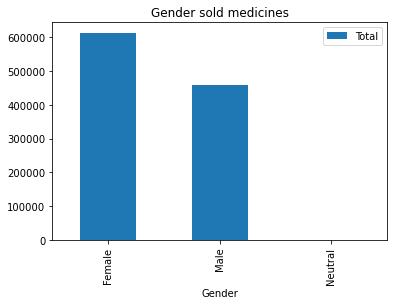

In [11]:
##plotting the histogram on pharmacy postcode so we can see which region sells the most medicines
from pandas import DataFrame
import matplotlib.pyplot as plt

datagender = {'Gender': ['Female','Male','Neutral'],
        'Total': [614182,458473,853]}
  
dfgender = DataFrame(datagender,columns=['Gender','Total'])
dfgender.plot(x ='Gender', y='Total', kind = 'bar')
plt.title('Gender sold medicines')
plt.show()

(1910.0, 2020.0)

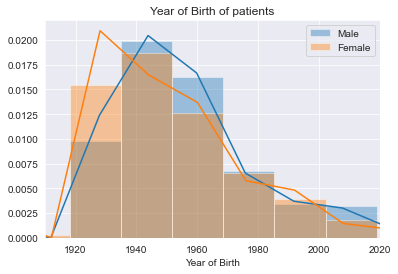

In [12]:
## I want to see which age group by which gender will most likely buy medications more 
## source: https://seaborn.pydata.org/generated/seaborn.countplot.html
## source: https://seaborn.pydata.org/generated/seaborn.distplot.html
import seaborn as sns

m_yob = df[df['Gender']=='Male']
f_yob = df[df['Gender']=='Female']

sns.set_style("darkgrid")

ax = sns.distplot(m_yob[['YOB']], bins = 120)
sns.distplot(f_yob[['YOB']], bins = 120)

plt.legend(['Male','Female','Neutral']);
plt.title('Year of Birth of patients')
plt.xlabel('Year of Birth')
plt.xlim(1910, 2020)

### Most sold products

In [13]:
## Here we want to see the top 5 most sold products in region 40 
df_products = df.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products5 = df_products.head(5)
df_products5


,Price,Product name,Counts
3629,3.14,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,13094
3626,3.09,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,13022
3623,3.04,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,12396
2855,0.03,ASAFLOW COMP 1 X 80 MG,11850
3040,0.12,BURINEX COMP 1 X 1 MG,7009


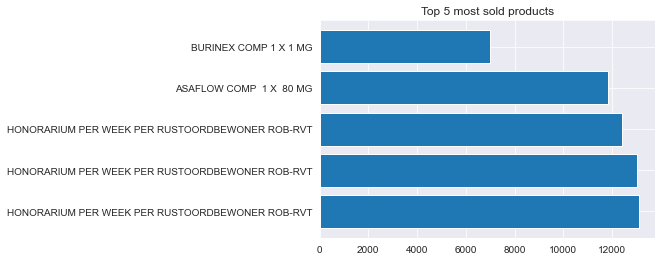

In [14]:
df_products = df.groupby(['Price','Product name'])['Gender'].count().reset_index()

df_products.columns=['Price','Product name','Counts']
df_products.sort_values(by='Counts',ascending=False,inplace=True)
df_products5 = df_products.head(5)

bars = df_products5['Product name']
height = df_products5['Counts']

y_pos = np.arange(len(bars))

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Top 5 most sold products')
plt.show()

In [29]:
df_productstype = df.groupby(['Price','Product name'])['Gender'].count().reset_index()
df_productstype.columns=['Price','Product name','Counts']
df_productstype.sort_values(by='Counts',ascending=False,inplace=True)

for i in range(0, len(df_productstype)):
    if ('honorarium' in df_productstype.loc[i, 'Product name'].lower()): 
        df_productstype.loc[i, 'ProductType'] = 'Honorarium'
    elif ('tab' in df_productstype.loc[i, 'Product name'].lower()): 
        df_productstype.loc[i, 'ProductType'] = 'Tablet'
    else:
        df_productstype.loc[i, 'ProductType'] = 'Pills'

df_productstype.head()


,Price,Product name,Counts,ProductType
3629,3.14,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,13094,Honorarium
3626,3.09,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,13022,Honorarium
3623,3.04,HONORARIUM PER WEEK PER RUSTOORDBEWONER ROB-RVT,12396,Honorarium
2855,0.03,ASAFLOW COMP 1 X 80 MG,11850,Pills
3040,0.12,BURINEX COMP 1 X 1 MG,7009,Pills


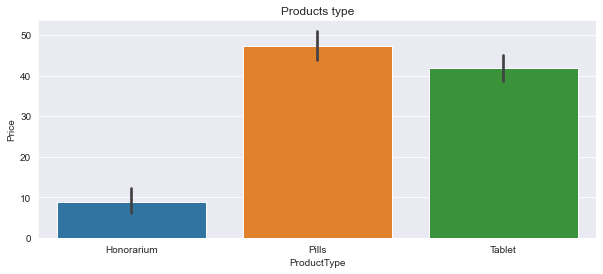

In [31]:
plt.figure(figsize=(10,4))
plt.title("Products type")
sns.barplot(x='ProductType', y='Price', data=df_productstype);

In [ ]:
df.groupby("Product type")["Product name"].count()
df

### Season

In [ ]:
## we are going to extract the months from the delivery date in order to categorize the the months in seasons
## source: https://stackoverflow.com/questions/41918115/how-do-i-extract-the-date-year-month-from-pandas-dataframe
df['Delivery month'] = df['Delivery date'].dt.month

In [ ]:
## now we are going to filter where month 12, 1 and 2 are winter. 

df.loc[df['Delivery date'].dt.month <= 2 , 'Season'] = 'Winter'
df.loc[df['Delivery date'].dt.month == 12 , 'Season'] = 'Winter'

## now we are going to filter where month 3, 4 and 5 are spring. 

df.loc[df['Delivery date'].dt.month == df['Delivery date'].dt.month.between(3,5), 'Season'] = 'Spring' 

## now we are going to filter were month 6, 7 and 8 are summer
df.loc[df['Delivery date'].dt.month == df['Delivery date'].dt.month.between(6,8), 'Season'] = 'Summer' 

## now we are going to filter where month 9, 10 and 11 are fall 

df.loc[df['Delivery date'].dt.month == 9, 'Season'] = 'Fall' 
df.loc[df['Delivery date'].dt.month == 10, 'Season'] = 'Fall' 
df.loc[df['Delivery date'].dt.month == 11, 'Season'] = 'Fall' 

df

In [ ]:
df_season = df.groupby(['Season'])['Product name'].count().reset_index()

df_season.columns=['Season', 'Total Product']
df_season.sort_values(by='Total Product',ascending=False,inplace=True)
df_season
